<a href="https://colab.research.google.com/github/Srinjana/Cohen_Lyrics_Generator/blob/master/lyric_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Traininng a Neural Network to generate new Leonard Cohen ❤ Lyrics using Recurrent Neural Networks.
# Uses Long Short term Memory (LSTM) to predict the next probable word based on previous trends and vice versa.
#we use a bidirectional LSTM on the training corpus to achieve required results.
#author = Srinjana Pathak

In [2]:
#IMPORTING NECESSARY PACKAGES

import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [3]:
#READING THE INPUT DATASET

data = open('leonard_cohen.txt').read()
corpus = data.lower().split("\n")

In [ ]:
#PREPROCESSING

tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1   #adding 1 for oov token

print(tokenizer.word_index)
print(total_words)


In [5]:
#CREATING TRAINING DATA

input_sequences = []

for line in corpus:
  
    #creating list of tokens for every line in corpus line by line

    token_list = tokenizer.texts_to_sequences([line])[0]

    #generating n-grams ("you see these, this is what comes next" word by word)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    

In [6]:
#PADDING SEQUENCES
max_sequence_len = max([len(x) for x in input_sequences]) 
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre')) 

In [7]:
#ADDING FEATURES AND LABELS.

#in the padded sequences everything but the last value is an x and the last value foms the label y.
#E.g. [0 0 0 0 0 3 4 5]  {5 is a label and everything else is under x(feature)}

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

#converts class vector(labels) to a binary class matrix

ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [ ]:
#TRAINING THE NEURAL NETWORK
model = Sequential()
model.add(Embedding(total_words, 240, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs = 100, verbose=1)

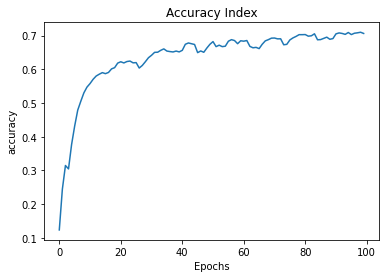

In [11]:
#Checking Accuracy (HOUSE-KEEPING)

import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Accuracy Index")
    plt.show()

plot_graphs(history, 'accuracy')

In [15]:
#GENERATING NEW TEXT

#seed_text = input()
#ideally the seed_text should be user input, it's cute, but this sppeds things up a bit.

seed_text = 'You were my reason'
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen= max_sequence_len - 1, padding = 'pre')
    predicted = model.predict_classes(token_list, verbose = 0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


You were my reason it was before it was before it was before going to do my lip you're all to the last you're of song i know it was trouble an altar shivering shivering around into into his skin of us turned well on go crazy our kisses too became been dying spark sand eye around from her mirror twin soon every night that strong soon must be back on again about on the before soon be sailors into his fiery flare and her eye around school disregard her mirror and death by surprise them here car has been working out of world
